# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [ ]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [ ]:
# YOUR CODE HERE

print('Printing the shape of X_train:', X_train.shape)
print('Printing the type of X_train:', type(X_train))
print('Printing the dtype of X_train:', X_train.dtype)
print('The shape of X_train shows a depth of 60000, which likely represents')
print('the number of images in the training dataset. The number of rows and')
print('columns are both 28, which instead represent the number of rows and')
print('columns of pixels for each image (28x28 square).\n')

print('Printing the shape of Y_train:', Y_train.shape)
print('Printing the type of Y_train:', type(Y_train))
print('Printing the dtype of Y_train:', Y_train.dtype)
print('The shape of Y_train, 60000, likely represents one of 10 classes that')
print('an image in the training dataset could be associated with.\n')

print('Printing the shape of X_test:', X_test.shape)
print('Printing the type of X_test:', type(X_test))
print('Printing the dtype of X_test:', X_test.dtype)
print('The shape of X_test shows a depth of 10000, which likely represents')
print('the number of images in the test dataset. The number of rows and')
print('columns are both 28, which instead represent the number of rows and')
print('columns of pixels for each image (28x28 square).\n')

print('Printing the shape of Y_test:', Y_test.shape)
print('Printing the type of Y_test:', type(Y_test))
print('Printing the dtype of Y_test:', Y_test.dtype)
print('The shape of Y_test, 10000, likely represents one of 10 classes that')
print('an image in the test dataset could be associated with.')

Printing the shape of X_train: (60000, 28, 28)
Printing the type of X_train: <class 'numpy.ndarray'>
Printing the dtype of X_train: uint8
The shape of X_train shows a depth of 60000, which likely represents
the number of images in the training dataset. The number of rows and
columns are both 28, which instead represent the number of rows and
columns of pixels for each image (28x28 square).

Printing the shape of Y_train: (60000,)
Printing the type of Y_train: <class 'numpy.ndarray'>
Printing the dtype of Y_train: uint8
The shape of Y_train, 60000, likely represents one of 10 classes that
an image in the training dataset could be associated with.

Printing the shape of X_test: (10000, 28, 28)
Printing the type of X_test: <class 'numpy.ndarray'>
Printing the dtype of X_test: uint8
The shape of X_test shows a depth of 10000, which likely represents
the number of images in the test dataset. The number of rows and
columns are both 28, which instead represent the number of rows and
columns o

In [ ]:
# Defining a list of strings of class names corresponding to each class
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
  'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('List of strings of class names corresponding to each class in Y_train '
  'and Y_test:')
print(label_names)

List of strings of class names corresponding to each class in Y_train and Y_test:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above).

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

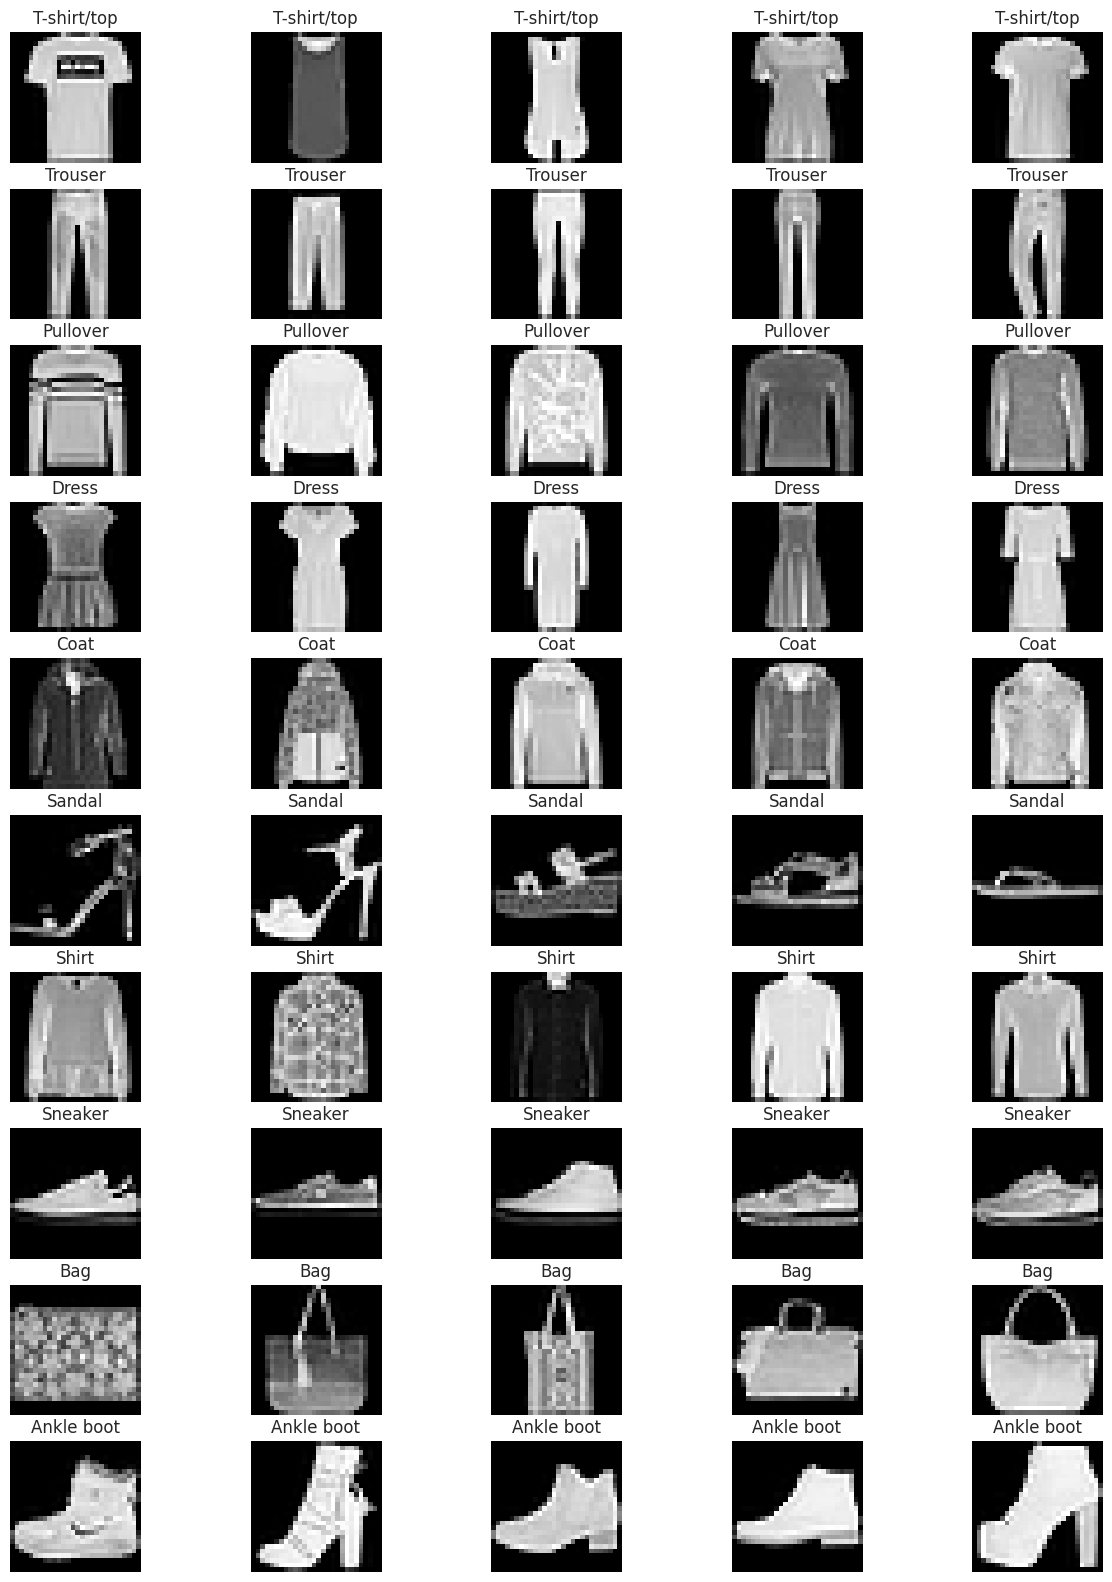

In [ ]:
# YOUR CODE HERE

# Mapping label_names to the appropriate number in Y_train
label_dict = {i: label_names[i] for i in range(len(label_names))}

# Initializing the X_train_dict to map each value in Y_train to the first five
# times it appears in the X_train dataset
X_train_dict = {}

# Getting the first 5 images in X_train for each class in Y_train
for i in range(len(label_dict)):
  X_train_dict[i] = list(np.where(Y_train == i)[0][:5])

# Displaying the first 5 images in X_train for each class in Y_train
fig, axs = plt.subplots(10, 5, figsize=(15, 20))

# Going through each class (row)
for i in range(len(X_train_dict)):

  # Going through the first 5 indices that corresponds to the class
  for j in range(len(X_train_dict[i])):
    axs[i, j].imshow(X_train[X_train_dict[i][j]], cmap='gray')
    axs[i, j].set_title(label_dict[i])
    axs[i, j].axis('off')


In [ ]:
# Determining the min and max pixel values for images in the X_train dataset
min_pixel_value = np.min(X_train)
max_pixel_value = np.max(X_train)

print('Minimum pixel value in X_train:', min_pixel_value)
print('Maximum pixel value in X_train:', max_pixel_value)

Minimum pixel value in X_train: 0
Maximum pixel value in X_train: 255


---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms.

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [ ]:
from re import X
# YOUR CODE HERE

# Defining a range of pixel values to normalize to
range_pixel_values = max_pixel_value - min_pixel_value

# 1. Normalizing pixel values in X_train and X_test so they range from 0 to 1
X_train = X_train / range_pixel_values
X_test = X_test / range_pixel_values

# 2. Reshaping the values for each image in X_train and X_test to a 1-D array of
# size 784
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# 3. Printing the shape of X_train and X_test arrays
print('Printing the shape of X_train:', X_train.shape)
print('Printing the shape of X_test:', X_test.shape)

Printing the shape of X_train: (60000, 784)
Printing the shape of X_test: (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows:
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [ ]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# YOUR CODE HERE

# Representing Y_train and Y_test as binary outcomes
Y_train = np.where(Y_train == 7, 1, 0)
Y_test = np.where(Y_test == 7, 1, 0)

### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. All the other arguments of the method are set to default values. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [ ]:
# YOUR CODE HERE

# Splitting the data at 80/20 for training/validation purposes
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(
    X_train, Y_train, test_size = 0.2, random_state = 1234)

print('Printing the shape of X_train_mini:', X_train_mini.shape)
print('Printing the shape of X_val:', X_val.shape)
print('Printing the shape of Y_train_mini:', Y_train_mini.shape)
print('Printing the shape of Y_val:', Y_val.shape)

Printing the shape of X_train_mini: (48000, 784)
Printing the shape of X_val: (12000, 784)
Printing the shape of Y_train_mini: (48000,)
Printing the shape of Y_val: (12000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative.

1. Use [integer array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing) to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [ ]:
np.random.seed(0)
# YOUR CODE HERE

# Creating a list of indices corresponding to the rows in X_train_mini
indices = np.arange(X_train_mini.shape[0])

# Creating shuffed_indices array
shuffled_indices = np.random.permutation(indices)

# Reordering X_train_mini & Y_train_mini based on the order in shuffled_indices
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]


---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

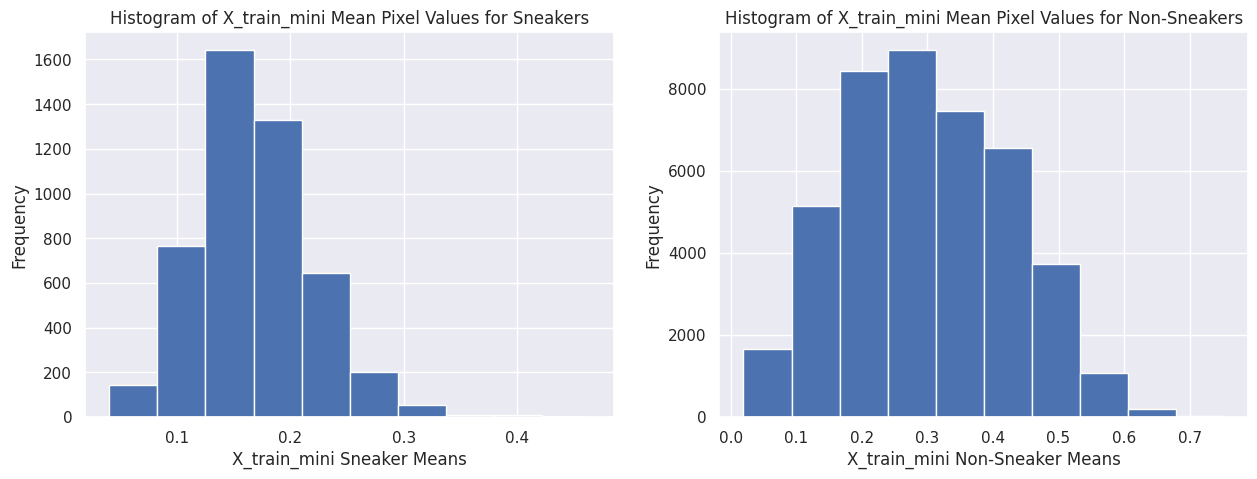

Printing the mean pixel value across sneaker images: 0.1682747275993731
Printing the mean pixel value across non-sneaker images: 0.2990019268123916


In [ ]:
# YOUR CODE HERE

# Getting the indices where Y_train_mini is either 1 or 0
Y_train_mini_1 = np.where(Y_train_mini == 1)[0]
Y_train_mini_0 = np.where(Y_train_mini == 0)[0]

# Identifying all sneaker and non-sneaker images in X_train_mini and calculating
# the mean pixel value for each sneaker and non-sneaker image
X_train_mini_sneaker_mean = np.mean(X_train_mini[Y_train_mini_1], axis=1)
X_train_mini_non_sneaker_mean = np.mean(X_train_mini[Y_train_mini_0], axis=1)

# Creating a figure with histogram subplots for sneaker vs non-sneaker mean
# pixel values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the histogram for X_train_mini_sneaker_mean
axs[0].hist(X_train_mini_sneaker_mean)
axs[0].set_xlabel("X_train_mini Sneaker Means")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram of X_train_mini Mean Pixel Values for Sneakers")

# Plotting the histogram for X_train_mini_non_sneaker_mean
axs[1].hist(X_train_mini_non_sneaker_mean)
axs[1].set_xlabel("X_train_mini Non-Sneaker Means")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histogram of X_train_mini Mean Pixel Values for Non-Sneakers")

# Displaying the plot
plt.show()

print('Printing the mean pixel value across sneaker images:',
      np.mean(X_train_mini_sneaker_mean))
print('Printing the mean pixel value across non-sneaker images:',
      np.mean(X_train_mini_non_sneaker_mean))

In [ ]:
print('While the mean pixel values between ALL sneakers and non-sneakers do')
print('seem to be significantly different, the histograms show that there does')
print('not seem to be strong evidence indicating that pixel values are')
print('significantly different between sneakers and non-sneakers. Looking at')
print('the images in the previous EDA section, we see from an eyeball test')
print('that sneakers generally take up less space in the image and there is')
print('more black (an encoding of 0) in those sneaker images. This likely')
print('explains why the normalized mean pixel values are smaller compared to')
print('that of the non-sneaker images.')
print('Overall, I would contend that the evidence is not strong enough to')
print('suggest that pixel values can be utilized to distinguish between')
print('sneaker and non-sneaker images.')

While the mean pixel values between ALL sneakers and non-sneakers do
seem to be significantly different, the histograms show that there does
not seem to be strong evidence indicating that pixel values are
significantly different between sneakers and non-sneakers. Looking at
the images in the previous EDA section, we see from an eyeball test
that sneakers generally take up less space in the image and there is
more black (an encoding of 0) in those sneaker images. This likely
explains why the normalized mean pixel values are smaller compared to
that of the non-sneaker images.
Overall, I would contend that the evidence is not strong enough to
suggest that pixel values can be utilized to distinguish between
sneaker and non-sneaker images.


---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?
2. What is the number of non-sneaker images in Y_train_mini?
3. What is the majority class in Y_train_mini?
4. What is the accuracy of a majority class classifier for Y_train_mini?
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [ ]:
# YOUR CODE HERE

print('1. Number of sneaker images in Y_train_mini:', Y_train_mini_1.shape[0])
print('2. Number of non_sneaker images in Y_train_mini:',
      Y_train_mini_0.shape[0])
print('3. Majority class in Y_train_mini:', 0, '(non-sneakers)')
print('4. Accuracy of a majority class classifier for Y_train_mini:',
      Y_train_mini_0.shape[0] / Y_train_mini.shape[0])


1. Number of sneaker images in Y_train_mini: 4800
2. Number of non_sneaker images in Y_train_mini: 43200
3. Majority class in Y_train_mini: 0 (non-sneakers)
4. Accuracy of a majority class classifier for Y_train_mini: 0.9


In [ ]:
# 5. Implementing a function that computes the log loss metric and uses it to
# evaluate this baseline on both Y_train_mini and Y_val datasets.

def compute_log_loss(preds, actual):
  loss = -np.mean(actual * np.log(preds) + (1 - actual) * np.log(1 - preds))
  return loss

# Creating baseline arrays w/ 0.1 as the predicted probability for each baseline
Y_train_mini_baseline = np.ones(Y_train_mini.shape) * 0.1
Y_val_baseline = np.ones(Y_val.shape) * 0.1

print('5. Baseline Log Loss on Y_train_mini:',
      compute_log_loss(Y_train_mini_baseline, Y_train_mini))
print('Baseline Log Loss on Y_val:', compute_log_loss(Y_val_baseline, Y_val))

5. Baseline Log Loss on Y_train_mini: 0.3250829733914482
Baseline Log Loss on Y_val: 0.3250829733914482


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

In [ ]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim
      input_shape=[num_features],  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer,    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(optimizer=optimizer, loss='binary_crossentropy',
                metrics=[tf.keras.metrics.BinaryAccuracy()])

  return model

In [ ]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE

# Building and compiling the model
model_tf = build_model(num_features = X_train_mini.shape[1],
                       learning_rate = 0.0001)

# 3. Fit the model
# YOUR CODE HERE

# Training model_tf using X_train_mini and Y_train_mini
model_tf_fit = model_tf.fit(
  x = X_train_mini,
  y = Y_train_mini,
  validation_data=[X_val, Y_val],
  epochs=5,
  batch_size=32,
  verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.1017 - loss: 208.5961 - val_binary_accuracy: 0.1000 - val_loss: 199.9825
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.1017 - loss: 196.0804 - val_binary_accuracy: 0.1000 - val_loss: 187.4252
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.1017 - loss: 183.5648 - val_binary_accuracy: 0.1000 - val_loss: 174.8679
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.1017 - loss: 171.0492 - val_binary_accuracy: 0.1000 - val_loss: 162.3107
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.1017 - loss: 158.5334 - val_binary_accuracy: 0.1000 - val_loss: 149.7533


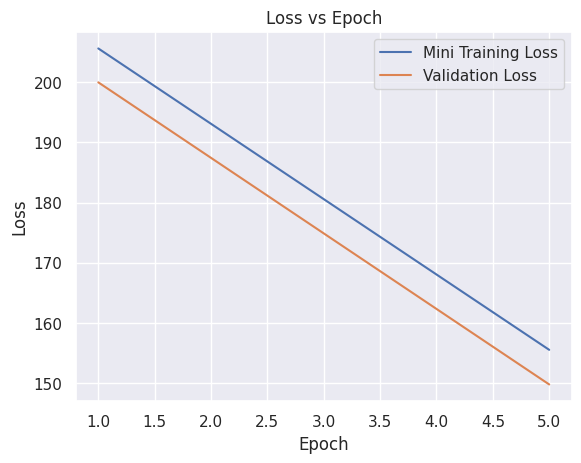

In [ ]:
# Generating a plot with loss on y-axis and epoch on x-axis
hist = model_tf_fit.history
plt.plot(range(1, 6), hist['loss'], label='Mini Training Loss')
plt.plot(range(1, 6), hist['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the **learning rate** and **number of epochs** hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for these hyperparameters. Hint: you can manually test different hyperparameter values or you can use the [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). If you decide to work with the Keras Tuner, define a new model building function named <span style="color:chocolate">build_model_tuner()</span>.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?


Please note that we will consider 'optimal model configuration' any last-epoch training and validation loss that is below 0.08.

In [ ]:
# YOUR CODE HERE

# Building and compiling the model using parameters after manual adjustments
num_epochs = 20
learning_rate = 0.01
model_tf = build_model(num_features = X_train_mini.shape[1],
                       learning_rate = learning_rate)

# Training model_tf using X_train_mini and Y_train_mini
model_tf_fit = model_tf.fit(
  x = X_train_mini,
  y = Y_train_mini,
  validation_data=[X_val, Y_val],
  epochs=num_epochs,
  batch_size=32,
  verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.4802 - loss: 60.1142 - val_binary_accuracy: 0.9037 - val_loss: 0.6340
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.9096 - loss: 0.5534 - val_binary_accuracy: 0.9278 - val_loss: 0.3845
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9288 - loss: 0.3574 - val_binary_accuracy: 0.9376 - val_loss: 0.2893
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - binary_accuracy: 0.9395 - loss: 0.2718 - val_binary_accuracy: 0.9438 - val_loss: 0.2346
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9460 - loss: 0.2227 - val_binary_accuracy: 0.9483 - val_loss: 0.1987
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.9508 - loss: 0.1912 - val_binary_accuracy: 0.9507 - val_loss: 0.1736
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9541 - loss: 0.1693 - val_binary_accuracy: 0.9538 - val_loss

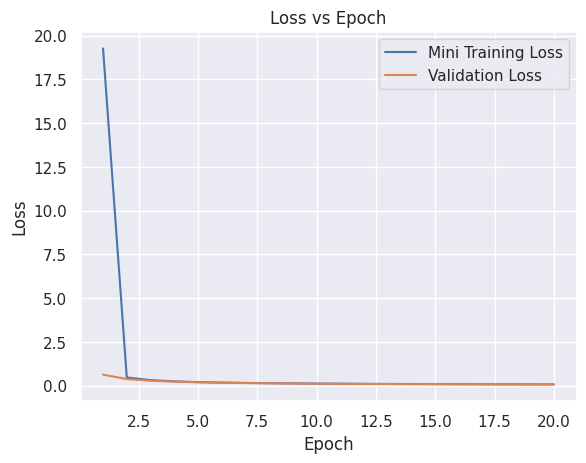

In [ ]:
# Generating a plot with loss on y-axis and epoch on x-axis
hist = model_tf_fit.history
plt.plot(range(1, num_epochs+1), hist['loss'], label='Mini Training Loss')
plt.plot(range(1, num_epochs+1), hist['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

In [ ]:
# 1. Identifying optimal model configuration
print("1. A model with a learning rate of 0.01 and epochs of 20 seems to yield")
print("decent results with last-epoch training and validation loss that are")
print("both below 0.08. It's hard to tell with the current visualization, but")
print("starting from the second epoch (and going to the end) does a better job")
print("of showing the improvement at each epoch:")

1. A model with a learning rate of 0.01 and epochs of 20 seems to yield
decent results with last-epoch training and validation loss that are
both below 0.08. It's hard to tell with the current visualization, but
starting from the second epoch (and going to the end) does a better job
of showing the improvement at each epoch:


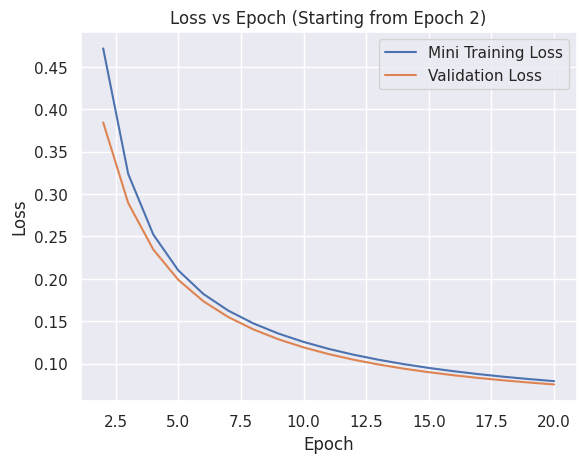

Here, we can see that the hyperparameters chosen seem to give a smooth
training curve, and it does not appear that it is overfitting.


In [ ]:
# Generating the same plot as above but starting on the second epoch
hist = model_tf_fit.history
plt.plot(range(2, num_epochs+1), hist['loss'][1:], label='Mini Training Loss')
plt.plot(range(2, num_epochs+1), hist['val_loss'][1:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Starting from Epoch 2)')
plt.legend()
plt.show()

print("Here, we can see that the hyperparameters chosen seem to give a smooth")
print("training curve, and it does not appear that it is overfitting.")

In [ ]:
# 2. Getting the first five learned parameters of the model (including bias)
print("2. The first five parameters for the features of the tuned model are:")
print(model_tf.layers[0].get_weights()[0][:5], '\n')
print("The learned parameter for the bias term of the tuned model is:")
print(model_tf.layers[0].get_weights()[1], '\n')

# 3. The loss at the final epoch on the mini training and validation datasets
print("3. Loss at the final epoch on the mini training set:", hist['loss'][-1])
print("Loss at the final epoch on the validation set:", hist['val_loss'][-1])

# 4. The percentage difference between the losses observed on the mini training
# and validation datasets
print("\n4. The percentage difference between the losses observed on the mini")
print("training and validation datasets is: " + str(round((
  hist['loss'][-1] - hist['val_loss'][-1]) / hist['loss'][-1] * 100, 2)) + "%")

# 5. Comparing the the training/validation loss on model_tf with the baseline
# model's loss
print("\n5. Baseline loss on Y_train_mini:",
      compute_log_loss(Y_train_mini_baseline, Y_train_mini))
print("Baseline loss on Y_val:", compute_log_loss(Y_val_baseline, Y_val), '\n')
print("Comparing both the training and validation loss of the TensorFlow model")
print("with the baseline model's loss for each, we see that the TensorFlow")
print("model does demonstrate an improvement over the baseline model, as the")
print("losses for TensorFlow model are lower than those for the baseline.")


2. The first five parameters for the features of the tuned model are:
[[0.9998195 ]
 [0.9994481 ]
 [0.9963831 ]
 [0.98870784]
 [0.97098374]] 

The learned parameter for the bias term of the tuned model is:
[-2.26811] 

3. Loss at the final epoch on the mini training set: 0.07934948801994324
Loss at the final epoch on the validation set: 0.07544814795255661

4. The percentage difference between the losses observed on the mini
training and validation datasets is: 4.92%

5. Baseline loss on Y_train_mini: 0.3250829733914482
Baseline loss on Y_val: 0.3250829733914482 

Comparing both the training and validation loss of the TensorFlow model
with the baseline model's loss for each, we see that the TensorFlow
model does demonstrate an improvement over the baseline model, as the
losses for TensorFlow model are lower than those for the baseline.


---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [ ]:
# YOUR CODE HERE

# Running the trained model on the mini train and test datasets
Y_train_mini_pred = model_tf.predict(x=X_train_mini).flatten()
Y_test_pred = model_tf.predict(x=X_test).flatten()

# Applying the threshold function to create a 0, 1 outcome
Y_train_mini_pred = np.where(Y_train_mini_pred >= 0.5, 1, 0)
Y_test_pred = np.where(Y_test_pred >= 0.5, 1, 0)

# Number of misclassified examples and the error for each
Y_train_mini_misclassified = (Y_train_mini != Y_train_mini_pred).sum()
error_train = Y_train_mini_misclassified / len(Y_train_mini_pred)
Y_test_misclassified = (Y_test != Y_test_pred).sum()
error_test = Y_test_misclassified / len(Y_test_pred)

print('Training, misclassified examples: %d' % (Y_train_mini_misclassified))
print('Test, misclassified examples: %d' % (Y_test_misclassified))

print('------------')
print('1. One way to calculate the accuracy would be to do it manually from')
print('the misclassified examples as we described above:\n')
print('Training, aggregate accuracy: %.3f' % (1-error_train))
print('Test, aggregate accuracy: %.3f' % (1-error_test), '\n')

print('Another way to calculate the accuracy could be to use the metrics')
print('method that we initially set in the function:\n')
print('Training, aggregate accuracy using tf.keras.metrics.BinaryAccuracy():',
  tf.keras.metrics.BinaryAccuracy()(Y_train_mini, Y_train_mini_pred).numpy())
print('Test, aggregate accuracy using tf.keras.metrics.BinaryAccuracy():',
  tf.keras.metrics.BinaryAccuracy()(Y_test, Y_test_pred).numpy(), '\n')

print('A final way to calculate the accuracy would be to use model.evaluate():')
print('\nTraining, aggregate accuracy using model.evaluate():',
  model_tf.evaluate(X_train_mini, Y_train_mini, verbose = 0)[1])
print('Test, aggregate accuracy using model.evaluate():',
  model_tf.evaluate(X_test, Y_test, verbose = 0)[1])
print('------------')

print('2. The model does seem to demonstrate strong aggregate generalization')
print('capabilities, at least in terms of accuracy. The accuracy was roughly')
print('the same between the training and test sets (~0.97), which seems to be')
print('pretty good. Comparing this accuracy with that of the baseline (0.9),')
print('this model does seem to perform better as well.')

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training, misclassified examples: 1252
Test, misclassified examples: 277
------------
1. One way to calculate the accuracy would be to do it manually from
the misclassified examples as we described above:

Training, aggregate accuracy: 0.974
Test, aggregate accuracy: 0.972 

Another way to calculate the accuracy could be to use the metrics
method that we initially set in the function:

Training, aggregate accuracy using tf.keras.metrics.BinaryAccuracy(): 0.97391665
Test, aggregate accuracy using tf.keras.metrics.BinaryAccuracy(): 0.9723 

A final way to calculate the accuracy would be to use model.evaluate():

Training, aggregate accuracy using model.evaluate(): 0.9739166498184204
Test, aggregate accuracy using model.evaluate(): 0.9722999930381775
------------
2. The model does seem to demonstrate strong aggregate generalization
capabilities, at least in terms of accuracy. The accuracy was roughly
the s

### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;

2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.

3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations.

In [ ]:
# YOUR CODE HERE

# 1. Generating a confusion matrix on the test dataset using tf.math:
conf_matrix = tf.math.confusion_matrix(
    Y_test,
    Y_test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
print('1. Generating the confusion matrix using tf.math:')
conf_matrix

1. Generating the confusion matrix using tf.math:


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8863,  137],
       [ 140,  860]], dtype=int32)>

In [ ]:
# Generating a confusion matrix using confusion_matrix from sklearn.metrics
conf_matrix_1 = confusion_matrix(
    Y_test,
    Y_test_pred
)

print('Generating the confusion matrix using confusion_matrix from '
  'sklearn.metrics instead:')
conf_matrix_1

Generating the confusion matrix using confusion_matrix from sklearn.metrics instead:


array([[8863,  137],
       [ 140,  860]])

Visualizing the confusion matrix using ConfusionMatrixDisplay fromsklearn:



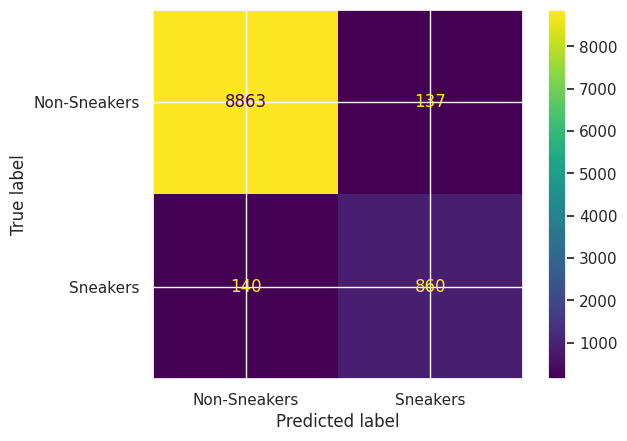

In [ ]:
# Visualizing the confusion matrix
print('Visualizing the confusion matrix using ConfusionMatrixDisplay from'
  'sklearn:\n')
ConfusionMatrixDisplay(conf_matrix_1,
                       display_labels=["Non-Sneakers", "Sneakers"]).plot()

In [ ]:
# Printing the True Positives (TP), False Negatives (FN), False Positives (FP),
# and True Negatives (TN)

Y_test_TP = conf_matrix_1[1, 1]
Y_test_FN = conf_matrix_1[1, 0]
Y_test_FP = conf_matrix_1[0, 1]
Y_test_TN = conf_matrix_1[0, 0]

print('True Positives (TP):', Y_test_TP)
print('False Negatives (FN):', Y_test_FN)
print('False Positives (FP):', Y_test_FP)
print('True Negatives (TN):', Y_test_TN)

True Positives (TP): 860
False Negatives (FN): 140
False Positives (FP): 137
True Negatives (TN): 8863


In [ ]:
# Computing subgroup accuracy separately for the sneaker and non-sneaker classes

print('2. Computing subgroup accuracy for the sneaker class:')
total_num_sneakers = Y_test.sum()
print('Accurately predicted sneakers:', Y_test_TP)
print('Total actual sneakers:', total_num_sneakers)
print('Subgroup accuracy for sneakers:', Y_test_TP / total_num_sneakers, '\n')

print('Computing subgroup accuracy for the non-sneaker class:')
total_num_non_sneakers = Y_test[Y_test == 0].shape[0]
print('Accurately predicted non-sneakers:', Y_test_TN)
print('Total actual non-sneakers:', total_num_non_sneakers)
print('Subgroup accuracy for non-sneakers:', Y_test_TN / total_num_non_sneakers)

print('\nThere definitely seems to be accuracy differences (i.e., a potential)')
print('lack of fairness) between the two classes. Specifically, the subgroup')
print('accuracy for the sneaker class (86%) is about 12% lower than that for')
print('the non-sneaker class (98.5%).')
print('This can likely be explained from the size differences between the two')
print('classes, as the true non-sneakers outnumber the true sneakers by 9x.')
print('Therefore, the impact from misclassifying a non-sneaker (as a sneaker)')
print('is much smaller than the impact from misclassifying a sneaker (as a')
print('non-sneaker). This can also be seen from the baseline case, where even')
print('if we classify the entire test dataset as a non-sneaker, the accuracy')
print('for correctly identifying the non-sneaker class would still be 90%,')
print('whereas the accuracy for correctly identifying the sneaker class would')
print('be 0%.')

2. Computing subgroup accuracy for the sneaker class:
Accurately predicted sneakers: 860
Total actual sneakers: 1000
Subgroup accuracy for sneakers: 0.86 

Computing subgroup accuracy for the non-sneaker class:
Accurately predicted non-sneakers: 8863
Total actual non-sneakers: 9000
Subgroup accuracy for non-sneakers: 0.9847777777777778

There definitely seems to be accuracy differences (i.e., a potential)
lack of fairness) between the two classes. Specifically, the subgroup
accuracy for the sneaker class (86%) is about 12% lower than that for
the non-sneaker class (98.5%).
This can likely be explained from the size differences between the two
classes, as the true non-sneakers outnumber the true sneakers by 9x.
Therefore, the impact from misclassifying a non-sneaker (as a sneaker)
is much smaller than the impact from misclassifying a sneaker (as a
non-sneaker). This can also be seen from the baseline case, where even
if we classify the entire test dataset as a non-sneaker, the accuracy


In [ ]:
# 3. Explaining why the model does not demonstrate strong subgroup
# generalization capabilities

print('3. The model does not seem to demonstrate strong subgroup')
print('generalization capabilities. While the accuracy for the entire test')
print('dataset may be comparable to that of the training or validation')
print('datasets, the subgroup accuracy for the sneaker class clearly does not')
print('generalize well to unseen data. While it may be better than the')
print('baseline (which, again, has a subgroup accuracy of 0% for the sneaker')
print('class), 86% is still not great, and you would still be misclassifying')
print('more than 1 out of 10 sneakers for every true sneaker.')


3. The model does not seem to demonstrate strong subgroup
generalization capabilities. While the accuracy for the entire test
dataset may be comparable to that of the training or validation
datasets, the subgroup accuracy for the sneaker class clearly does not
generalize well to unseen data. While it may be better than the
baseline (which, again, has a subgroup accuracy of 0% for the sneaker
class), 86% is still not great, and you would still be misclassifying
more than 1 out of 10 sneakers for every true sneaker.


----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.

In [ ]:
np.random.seed(0)
# 1. Implementing undersampling on the training dataset by randomly picking
# indices from the list of indices of non-sneakers

sneaker_indices = np.where(Y_train_mini == 1)[0]
non_sneaker_indices = np.where(Y_train_mini != 1)[0]
non_sneaker_indices_shuffled = np.random.permutation(non_sneaker_indices)
non_s_ind_keep = non_sneaker_indices_shuffled[:4800]

X_train_under_indices = np.concatenate((non_s_ind_keep, sneaker_indices))
X_train_under_indices = np.sort(X_train_under_indices)

X_train_under = X_train_mini[X_train_under_indices]
Y_train_under = Y_train_mini[X_train_under_indices]

print('Equal number of sneakers and non-sneakers in undersampled arrays:')
print('X_train_under shape:', X_train_under.shape)
print('Y_train_under shape:', Y_train_under.shape)

Equal number of sneakers and non-sneakers in undersampled arrays:
X_train_under shape: (9600, 784)
Y_train_under shape: (9600,)


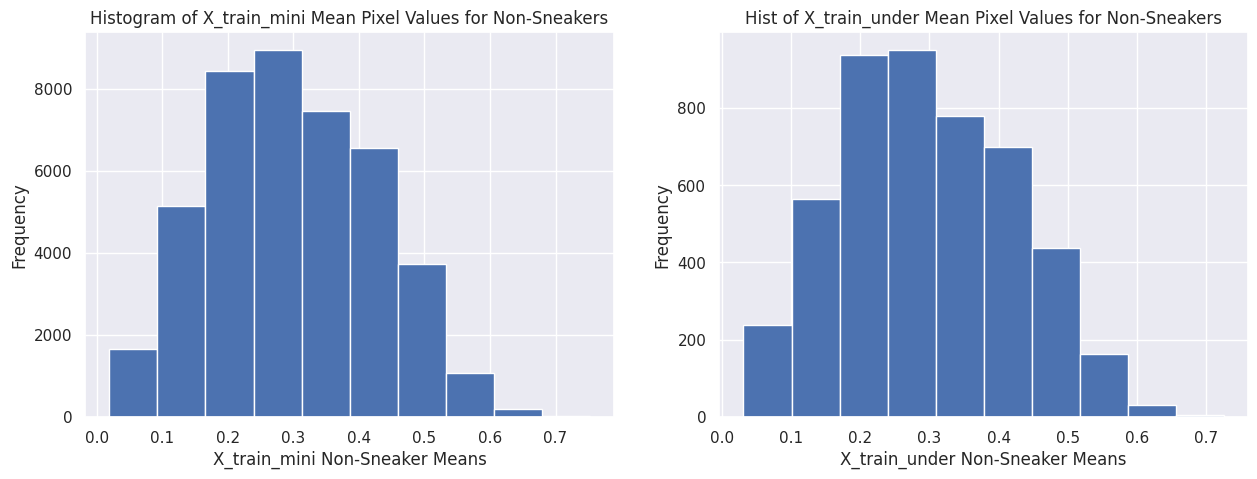

Printing the mean pixel value across X_train_mini: 0.2990019268123916
Printing the mean pixel value across X_train_under: 0.29646775064192343


In [ ]:
# Confirming the distribution of non-sneakers stays the same

# Getting the indices where Y_train_under is 0
Y_train_under_0 = np.where(Y_train_under == 0)[0]

# Identifying all non-sneaker images in X_train_under and calculating the mean
# pixel value for each non-sneaker image
X_train_under_non_sneaker_mean = np.mean(X_train_under[Y_train_under_0], axis=1)

# Creating a figure with hist subplots comparing X_train_mini and X_train_under
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the histogram for X_train_mini_non_sneaker_mean
axs[0].hist(X_train_mini_non_sneaker_mean)
axs[0].set_xlabel("X_train_mini Non-Sneaker Means")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram of X_train_mini Mean Pixel Values for Non-Sneakers")

# Plotting the histogram for X_train_under_non_sneaker_mean
axs[1].hist(X_train_under_non_sneaker_mean)
axs[1].set_xlabel("X_train_under Non-Sneaker Means")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Hist of X_train_under Mean Pixel Values for Non-Sneakers")

# Displaying the plot
plt.show()

print('Printing the mean pixel value across X_train_mini:',
      np.mean(X_train_mini_non_sneaker_mean))
print('Printing the mean pixel value across X_train_under:',
      np.mean(X_train_under_non_sneaker_mean))

In [ ]:
# Therefore, we can confirm the distribution is roughly the same as before^

In [ ]:
tf.random.set_seed(0)
# 2. Retraining the model on the balanced dataset

num_epochs = 20
learning_rate = 0.2

# Building and compiling the model
model_under = build_model(num_features = X_train_under.shape[1],
                       learning_rate = learning_rate)

# Training model_under using X_train_under and Y_train_under
model_under_fit = model_under.fit(
  x = X_train_under,
  y = Y_train_under,
  validation_data=[X_val, Y_val],
  epochs=num_epochs,
  batch_size=32,
  verbose=1)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - binary_accuracy: 0.7476 - loss: 19.6637 - val_binary_accuracy: 0.9060 - val_loss: 0.3926
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - binary_accuracy: 0.9246 - loss: 0.3066 - val_binary_accuracy: 0.9338 - val_loss: 0.2047
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - binary_accuracy: 0.9417 - loss: 0.1950 - val_binary_accuracy: 0.9488 - val_loss: 0.1413
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.9533 - loss: 0.1488 - val_binary_accuracy: 0.9553 - val_loss: 0.1176
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9584 - loss: 0.1254 - val_binary_accuracy: 0.9611 - val_loss: 0.1045
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.9605 - loss: 0.1117 - val_binary_accuracy: 0.9637 - val_loss: 0.0968
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9641 - loss: 0.1030 - val_binary_accuracy: 0.9659 - val_loss: 0.0922
Epoch

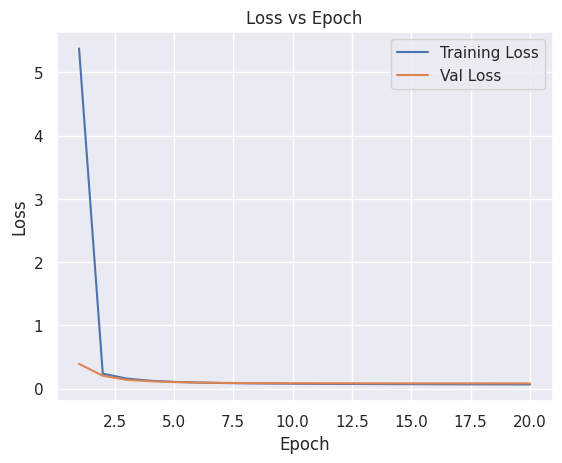

In [ ]:
# Generating a plot with loss on y-axis and epoch on x-axis
hist_under = model_under_fit.history
plt.plot(range(1, num_epochs+1), hist_under['loss'], label='Training Loss')
plt.plot(range(1, num_epochs+1), hist_under['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

In [ ]:
# In the above example, the training loss a bit lower, but that's because our
# learning rate was 20x larger; the validation loss is actually larger, and it's
# likely difficult to get it under 0.08 without many more epochs (i.e., the
# juice isn't worth the squeeze).

In [ ]:
# 3. Evaluating overall accuracy for the model's performance

print('\nTraining, aggregate accuracy using model.evaluate():',
  model_under.evaluate(X_train_under, Y_train_under, verbose = 0)[1])
print('Test, aggregate accuracy using model.evaluate():',
  model_under.evaluate(X_test, Y_test, verbose = 0)[1])

# Running the trained model on the X_test dataset
Y_test_pred_under = model_under.predict(x=X_test).flatten()

# Applying the threshold function to create a 0, 1 outcome
Y_test_pred_under = np.where(Y_test_pred_under >= 0.5, 1, 0)



Training, aggregate accuracy using model.evaluate(): 0.9772916436195374
Test, aggregate accuracy using model.evaluate(): 0.9722999930381775
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Generating a confusion matrix using confusion_matrix from sklearn.metrics
conf_matrix_2 = confusion_matrix(
    Y_test,
    Y_test_pred_under
)

print('Generating the confusion matrix using confusion_matrix from '
  'sklearn.metrics:')
conf_matrix_2

Generating the confusion matrix using confusion_matrix from sklearn.metrics:


array([[8741,  259],
       [  18,  982]])

Visualizing the confusion matrix using ConfusionMatrixDisplay fromsklearn:



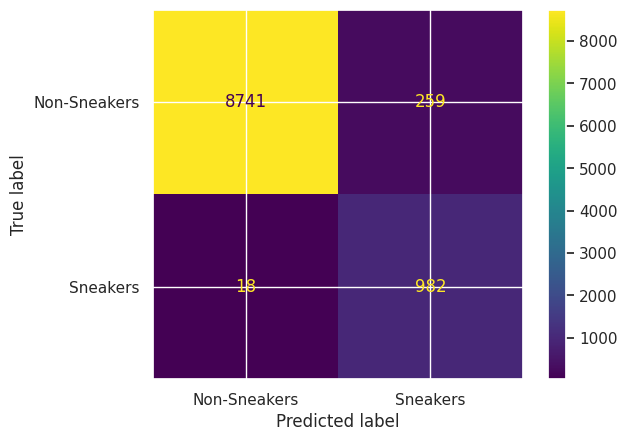

In [ ]:
# Visualizing the confusion matrix
print('Visualizing the confusion matrix using ConfusionMatrixDisplay from'
  'sklearn:\n')
ConfusionMatrixDisplay(conf_matrix_2,
                       display_labels=["Non-Sneakers", "Sneakers"]).plot()

In [ ]:
# Printing the True Positives (TP), False Negatives (FN), False Positives (FP),
# and True Negatives (TN)

Y_test_TP_2 = conf_matrix_2[1, 1]
Y_test_FN_2 = conf_matrix_2[1, 0]
Y_test_FP_2 = conf_matrix_2[0, 1]
Y_test_TN_2 = conf_matrix_2[0, 0]

print('True Positives (TP):', Y_test_TP_2)
print('False Negatives (FN):', Y_test_FN_2)
print('False Positives (FP):', Y_test_FP_2)
print('True Negatives (TN):', Y_test_TN_2)

True Positives (TP): 982
False Negatives (FN): 18
False Positives (FP): 259
True Negatives (TN): 8741


In [ ]:
# Computing subgroup accuracy separately for the sneaker and non-sneaker classes

print('Computing subgroup accuracy for the sneaker class:')
total_num_sneakers = Y_test.sum()
print('Accurately predicted sneakers:', Y_test_TP_2)
print('Total actual sneakers:', total_num_sneakers)
print('Subgroup accuracy for sneakers:', Y_test_TP_2 / total_num_sneakers, '\n')

print('Computing subgroup accuracy for the non-sneaker class:')
total_num_non_sneakers = Y_test[Y_test == 0].shape[0]
print('Accurately predicted non-sneakers:', Y_test_TN_2)
print('Total actual non-sneakers:', total_num_non_sneakers)
print('Subgroup accur. for non-sneakers:', Y_test_TN_2 / total_num_non_sneakers)

print('\nThis is quite fascinating, especially compared with the previous')
print('experiment. The overall accuracy stayed roughly the same, and the')
print('accuracy of identifying non-sneakers actually dropped ~1%. However,')
print('the subgroup accuracy for the sneaker classes shot up by 12%, all the')
print('way to ~98%. This essentially means that given 100 images of actual')
print('sneakers, the model will say that 98 of them are sneakers.')
print('This finding tells us that if we sacrifice some precision in our model')
print('(i.e., how "correct" our model is when identifying a sneaker, or the')
print('number of sneakers identified that are actually sneakers), our recall')
print('(i.e., how well our model can identify sneakers in general) can be')
print('greatly increased. In other words, if our goal is to make sure we')
print('accurately identify a sneaker when we do come across one, this second')
print('model after undersampling is the way to go.\n')

precision_mini = Y_test_TP / (Y_test_TP + Y_test_FP)
recall_mini = Y_test_TP / (Y_test_TP + Y_test_FN)
F1_mini = 2 * (precision_mini * recall_mini)/(precision_mini + recall_mini)

precision_under = Y_test_TP_2 / (Y_test_TP_2 + Y_test_FP_2)
recall_under = Y_test_TP_2 / (Y_test_TP_2 + Y_test_FN_2)
F1_under = 2 * (precision_under * recall_under)/(precision_under + recall_under)

print('Precision of model_mini:', precision_mini)
print('Recall of model_mini:', recall_mini)
print('Precision of model_under:', precision_under)
print('Recall of model_under:', recall_under)
print('F1 score of model_mini:', F1_mini)
print('F1 score of model_under:', F1_under)

Computing subgroup accuracy for the sneaker class:
Accurately predicted sneakers: 982
Total actual sneakers: 1000
Subgroup accuracy for sneakers: 0.982 

Computing subgroup accuracy for the non-sneaker class:
Accurately predicted non-sneakers: 8741
Total actual non-sneakers: 9000
Subgroup accur. for non-sneakers: 0.9712222222222222

This is quite fascinating, especially compared with the previous
experiment. The overall accuracy stayed roughly the same, and the
accuracy of identifying non-sneakers actually dropped ~1%. However,
the subgroup accuracy for the sneaker classes shot up by 12%, all the
way to ~98%. This essentially means that given 100 images of actual
sneakers, the model will say that 98 of them are sneakers.
This finding tells us that if we sacrifice some precision in our model
(i.e., how "correct" our model is when identifying a sneaker, or the
number of sneakers identified that are actually sneakers), our recall
(i.e., how well our model can identify sneakers in general)

In [ ]:
print("If we apply this case to cancer detection, for example, where our goal")
print("is to make sure we don't miss the cancer if it's there, we would want")
print("to go with the second model. The reasoning behind that is the same as")
print("the reasoning for the sneaker case, where let's assume the rate of")
print("cancer is 1/10, or 1000 patients out of 10000. Since we want to")
print("minimize false negatives, or not missing cancer when it actually")
print("exists, we would want our recall to be maximized. And going with the")
print("second model, of the 1000 patients who do have cancer, we would be able")
print("to catch the cancer in 982 of them, whereas we would only catch 860 in")
print("the first model.")
print("The main caveat is that our false positives will increase quite a bit,")
print("meaning that patients without cancer that are diagnosed as having")
print("cancer goes up. However, assuming the cost of inaccurately diagnosing a")
print("patient with cancer is not extreme, this cost might just be worth it if")
print("we can catch true cases of cancer in more patients.")

If we apply this case to cancer detection, for example, where our goal
is to make sure we don't miss the cancer if it's there, we would want
to go with the second model. The reasoning behind that is the same as
the reasoning for the sneaker case, where let's assume the rate of
cancer is 1/10, or 1000 patients out of 10000. Since we want to
minimize false negatives, or not missing cancer when it actually
exists, we would want our recall to be maximized. And going with the
second model, of the 1000 patients who do have cancer, we would be able
to catch the cancer in 982 of them, whereas we would only catch 860 in
the first model.
The main caveat is that our false positives will increase quite a bit,
meaning that patients without cancer that are diagnosed as having
cancer goes up. However, assuming the cost of inaccurately diagnosing a
patient with cancer is not extreme, this cost might just be worth it if
we can catch true cases of cancer in more patients.
